# Homework 3 Solutions

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Question 1:
You are given five input features and want to predict the salary
based on the features. $x_1$ is the experience in data science, $x_2$ is the experience in math, $x_3$ is the
degree level (1 for graduate and 0 for undergraduate), $x_4$ is the interaction
between experience in data science and math, $x_5$ is the interaction
between the experience in data science and degree.

### Part a.) 
**Question:** Write the equation of the regression model (2 points)  

Equation of the regression model:
$$y=50+20x_1+0.07x_2+35x_3+0.01x_4-10x_5$$
Replacing interaction terms:
$$y=50+20x_1+0.07x_2+35x_3+0.01x_1*x_2-10x_1*x_3$$

### Part b.)
**Question:** For a fixed value of data science and math experience, what can
you conclude about the salaries of graduate vs undergraduates? (5
points)  

First, let the sum of all the constant terms equal c, so the equation becomes:
$$y=c+35x_3-10x_1*x_3$$
Note that $x_3$ must equal either 0 (for undergraduate) or 1 (for graduate), giving us two equations:
<center>$y=c$    &nbsp;&nbsp;&nbsp;&nbsp; [When $x_3=0$]
<center>$y=c+35-10x_1$    &nbsp;&nbsp;&nbsp;&nbsp; [When $x_3=1$]  
    
When will the salaries of graduates be greater than the salary of undergraduates?   
The second equation (representing graduate salaries) is greater when $35-10x_1>0$. Solving this equation gives:
$$x_1<3.5$$
  
Thus, the salaries of graduates are greater than undergraduates when experience in data science is less than 3.5, and are less than undergraduates when experience in data science is greater than 3.5. 

### Part c.)  
**Question:** Since the coefficient of interaction between experience in data
science and math is small, can you say that there is very little
evidence of an interaction effect? Explain your answer. (3 points)  

Although the coefficient of interaction between experience in data science and math is small, you can not say that there is very little evidence of an interaction effect. This is because the scale of the two terms interacting must also be taken into account, for example if experience in data science and experience in math were very large, then the interaction effect would still be important, since the magnitude of the interaction term would be large despite its small coefficient. 

## Question 2:

**Question:** You sampled 30 people from a population of 100. You are
investigating if the exposure to undergraduate research has an effect on
successful admissions in grad school. The control group of 15 people
didn’t receive undergraduate research experience and the other 15 people
did receive research experience. Carry out analysis to see if there is a
significant difference between the two groups (use a p-value of 0.05).
Control group (mean = 30, std_dev = 6.63); other group (mean = 26,
std_dev = 6.20). (10 points)

First, we need to determine the null and alternative hypothesis:  
$H_0$ (Null hypothesis): The two groups are not different meaning undergraduate research experience has no effect on graduate school admissions
$H_1$ (Alternative hypothesis) These two groups are different and the undergraduate research experience had a significant effect on the admissions.  

Next, we need to decide what type of test to use. In this case, since we have two samples we know we will be using a two sample test of some type. Since the sample sizes are less than 30, and we don't know what the population distribution is we should use a t-test (note: either the small sample size, or the lack of knowledge of the population distribution would independently require the use of a t-test, rather than a z-test).   

Further, our alternative makes no claim that one mean is greater than the other, this indicates that a two tailed test should be used.   

All together, this means we will be employing a two tailed, two sample t-test, with significance level of 0.05. 

Now, we need to calculate the two sample t-statistic, using this formula:
$$t=\frac{(\bar x_1 - \bar x_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$
Where $\bar x$ represents the sample mean, $s$ represents the sample standard deviation, and n represents the sample size. 

In [ ]:
# Calculate the t-statistic
x1=30
s1=6.63
n1=15
x2=26
s2=6.20
n2=15
t_stat = (x1-x2)/np.sqrt((s1**2/n1)+(s2**2/n2))
print(f"The t-statistic is {t_stat}")

There are now two ways to find whether this value is significant, using a t-test table and finding the critical t-value, or calculating the p-value. We will start with using a t-test table. 

#### Method 1: t-table
A t-test table, or t Table is used to find the critical value for a t-test. If your calculated test statistic is greater than the critical value, you reject the null hypothesis. Below is an example of a t Table:

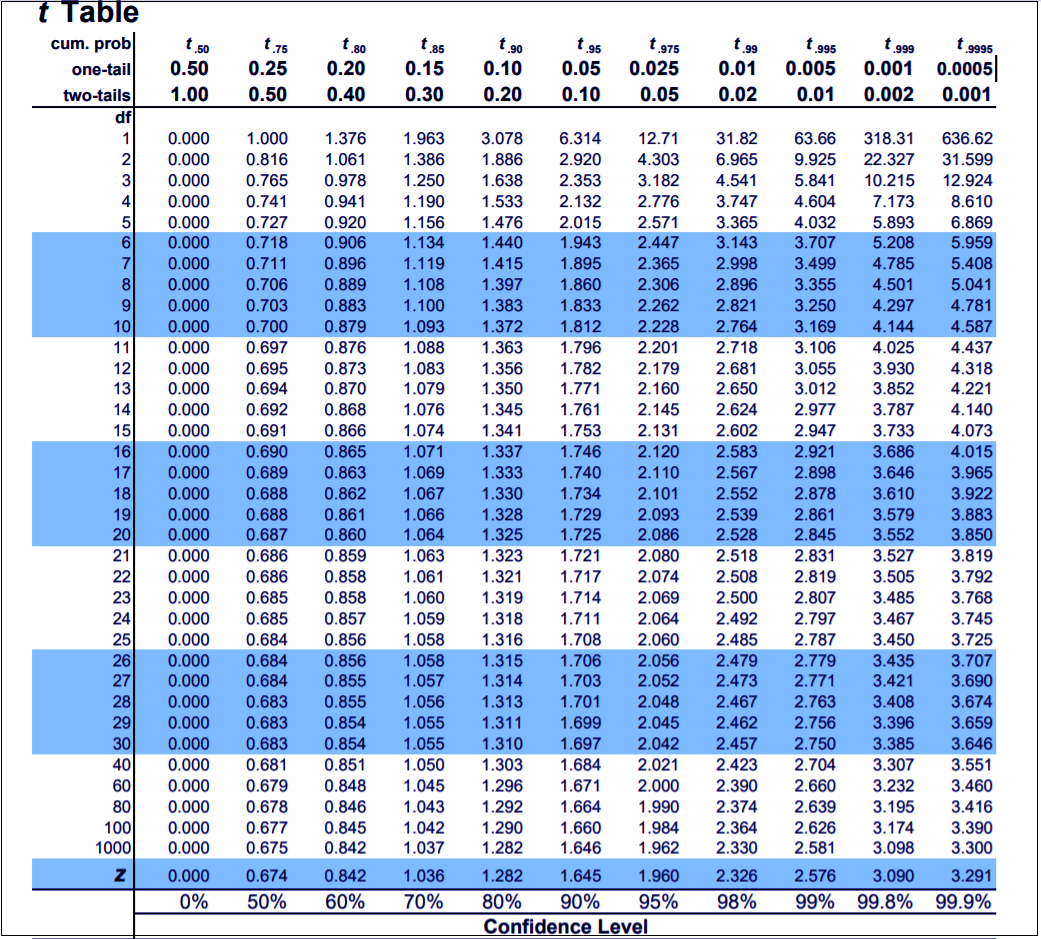

In order to use this, we need to find the degrees of freedom, which for a two sample t-test is:
$$df = n_1+n_2-2$$
In our case, this is 28.

We are performing a two tailed test, so we look in the column marked:  

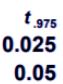  

Since that is where the two tailed significance matches our desired significance level. Looking at the entry in this column, at the row matching our degrees of freedom (28), we find a value of 2.048. 

Our calculated t-statistic is **less than** the critical value, so we **fail to reject the null hypothesis.**

#### Method 2: p-value

In order to find the p-value, we need to find the are in the tails of the t-distribution beyond our critical value. Since we are performing a two tailed test, we want to find the area in the tails greater than the positive value of our t-statistic, and less than the negative value of the t-statistic.  

Let's visualize the are we want to find (this is not required for the homework, but makes explaining easier):

In [ ]:
# Visualize the area we want to find
t_dist = scipy.stats.t(loc=0, scale=1, df=28) # Create the distribution
fig, ax = plt.subplots() # Create the subplots
x = np.linspace(-3, 3, 300) # Create the values for x
y = t_dist.pdf(x)
ax.plot(x,y, label="t distribution")

ax.vlines(x=[t_stat, -t_stat], ymin=0, ymax=0.4, colors='r', label="t statistic")
low_x = np.linspace(-3, -t_stat, 100)
high_x = np.linspace(t_stat, 3, 100)
ax.fill_between(x=x,y1=y, where=(x<-t_stat) | (x>t_stat))
ax.set_xlabel("Values")
ax.set_ylabel("PDF")
ax.legend()

To find the area under the curve, we can use the cdf function from the t-distribution.

In [ ]:
# First, find the area up to the t-statistic
area_to_tail = t_dist.cdf(t_stat)
# Area beyond the t-statistic
area_in_tail = 1-area_to_tail # Since the total area under the curve is 1
# This is the area in one tail, but we need the area in two tails. Since the distribution is symetric, we can multiply this by 2. 
p_val = area_in_tail*2
# The above is equivalent to area below negative t-statistic plus area above positive t-statistic:
p_val2 = t_dist.cdf(-1*t_stat)+ (1-t_dist.cdf(t_stat))
print(f"The p-value is {p_val:.4f}") # for information on how to use f-strings in python 
# see http://cissandbox.bentley.edu/sandbox/wp-content/uploads/2022-02-10-Documentation-on-f-strings-Updated.pdf
print(f"The p-value from the other method is {p_val2:.4f}")

Since this calculated p-value is **greater than** the significance level, we **fail to reject the null hypothesis**. 

In the first method, looking up a t-table, basically what we are doing is finding the t-statistic which corresponds to our desired significance level. If our t-statistic we calculate is greater than that value, the p-value we could find using the second method would be less than our significance level. This is because, if our calculated value is greater than the critical value we look up, that means we are farther into the tails than the value that corresponds to an area under the curve equal to our significance level, so we have a lower p-value than our desired significance. 

## Question 3:

**Question:** Submit the class exercise (done on 10/16) along with plotting
first 10 steps of the gradient descent in the form of the corresponding
linear regression lines. (20 points)

### data and true fit

In [3]:
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = np.random.rand(m, 1)  # column vector
y =  1+ 2 * X + np.random.randn(m, 1)  # column vector

In [4]:
from sklearn.preprocessing import add_dummy_feature
# the above function add x0 = 1 to your instances 
##### one line of code here ##### 
X_b=add_dummy_feature(X)

In [5]:
### use least squares way to calculate your best parameters

## theta_best = your code ###
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# or alternatively 
theta_best2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_b), X_b)), np.transpose(X_b)),y)
print(f"Theta best is \n{theta_best}")
print(f"Theta best from the alternative method is \n{theta_best2}")

Theta best is 
[[1.21509616]
 [1.54022677]]
Theta best from the alternative method is 
[[1.21509616]
 [1.54022677]]


In [6]:
# print theta_best
print(theta_best)

[[1.21509616]
 [1.54022677]]


In [7]:
# make a prediction
X_new = np.array ([[0],[1]])

# First need to add dummy feature like with the original X matrix
X_new_b = add_dummy_feature(X_new)

# Now, we can make a prediction for the y values of these points using the formula for linear regression
y_new = X_new_b @ theta_best
# Equivalent to 
y_new2 = np.matmul(X_new_b, theta_best)

Text(0.5, 1.0, 'Original Data and Predicted values')

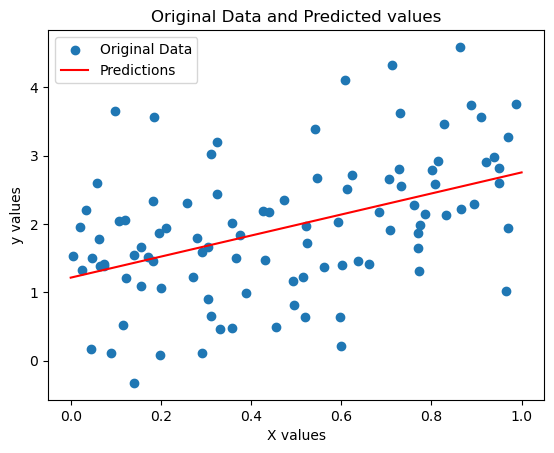

In [8]:
# plot the predictions and your data points 
fig, ax = plt.subplots()

# First, plot the data points
ax.scatter(X_b[:,1], y, label="Original Data")
# Then plot the predictions
ax.plot(X_new_b[:,1], y_new, c="r", label="Predictions")
ax.set_xlabel("X values")
ax.set_ylabel("y values")
ax.legend()
ax.set_title("Original Data and Predicted values")

Text(0.5, 1.0, 'Original Data and Predicted values')

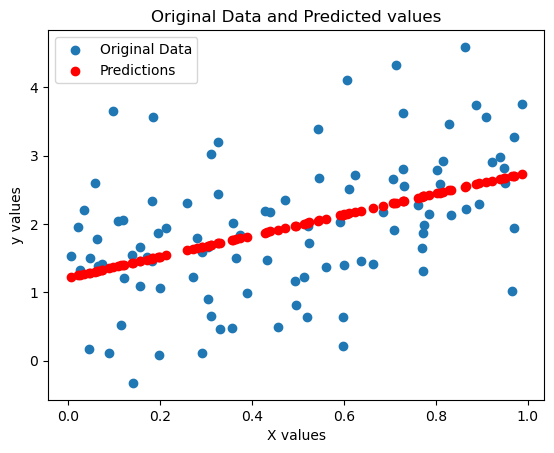

In [9]:
# We can also plot predicted values for all the X-values,
# Not required, just demonstrating
fig, ax = plt.subplots()
y_predicted = X_b@theta_best

# First, plot the data points
ax.scatter(X_b[:,1], y, label="Original Data")
# Then plot the predictions
ax.scatter(X_b[:,1], y_predicted, c="r", label="Predictions") # Plotting all predictions instead of just line between 2
ax.set_xlabel("X values")
ax.set_ylabel("y values")
ax.legend()
ax.set_title("Original Data and Predicted values")

In [10]:
from sklearn.linear_model import LinearRegression
#fit a linear regression model and print the coefficients (look at sklearn documentation)
## lin_reg = your code ### 
lin_reg = LinearRegression()
lin_reg.fit(X, y) 
lin_reg.intercept_, lin_reg.coef_

(array([1.21509616]), array([[1.54022677]]))

Text(0.5, 1.0, 'Original Data and Predicted values using Sklearn')

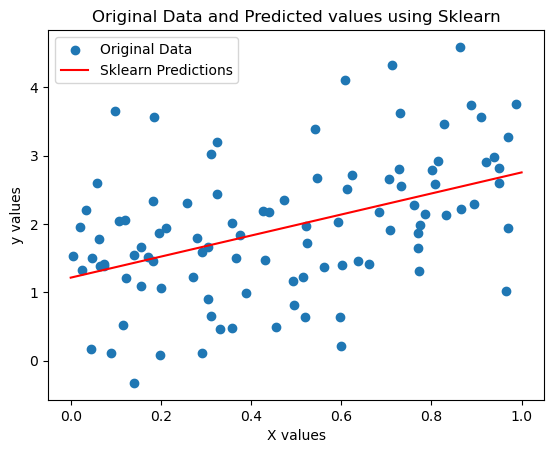

In [11]:
# predict using linear and X_new as provided before 
y_sklearn_pred = lin_reg.predict(X_new)

# plot the predictions and your data points 
fig, ax = plt.subplots()

# First, plot the data points
ax.scatter(X[:,0], y, label="Original Data")
# Then plot the predictions
ax.plot(X_new[:,0], y_sklearn_pred, c="r", label="Sklearn Predictions")
ax.set_xlabel("X values")
ax.set_ylabel("y values")
ax.legend()
ax.set_title("Original Data and Predicted values using Sklearn")

In [32]:
# gradient descent
r = 0.1  # learning rate
n_epochs = 1000
np.random.seed(42)
 # randomly initialized model parameters
# First we need to randomly guess some initial theta

theta_guess = np.random.randn(2, 1)  # randomly initialized model parameters
saved_theta = {}


for epoch in range(n_epochs):
    # Your code here 
    # Save the theta values for the first 10 epochs
    if epoch <= 10:
        saved_theta[epoch]=theta_guess.copy()
    # Calculate the gradient vector using the formula from lecture 9
    m = X_b.shape[0] # m is the number of data points, so the number of rows of X
    mse_grad = (2/m)*(X_b.T@(X_b@theta_guess - y)) # Calculate the gradient
    # Now we need to update theta
    theta_guess = theta_guess - r*mse_grad # Take a step in the gradient direction, with length equal to the learning rate r
theta_gd = theta_guess

In [34]:
#print theta computed from gradient descent 
print(theta_gd)

[[1.2150965]
 [1.5402261]]


Text(0.5, 1.0, 'Predictions from first 10 Epochs of Gradient Descent')

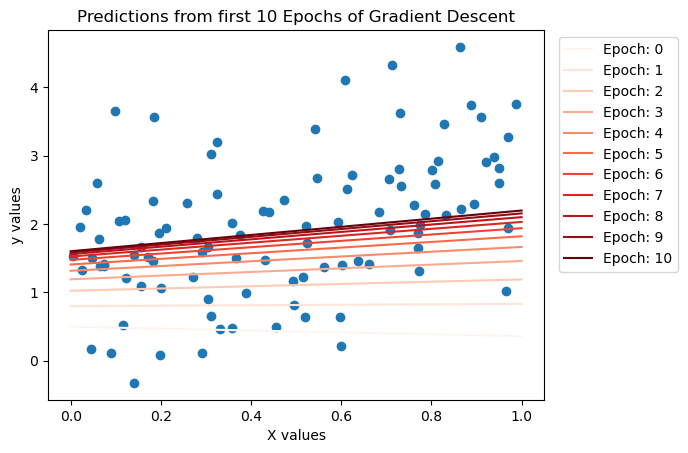

In [35]:
# Printing the 10 lines corresponding to the first 10 epochs
fig, ax = plt.subplots()
# Create a color map
cmap = mpl.colormaps["Reds"]
# Plot original data
ax.scatter(X[:,0], y)

X_new = np.array([[0],[1]])
X_new = add_dummy_feature(X_new)

for epoch, theta in saved_theta.items():
    # Make a prediction with the model
    y_pred = X_new @ theta
    # Find correct color
    color = cmap((epoch/(10)))
    ax.plot(X_new[:,1], y_pred, c=color, label=f"Epoch: {epoch}")
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0))
ax.set_xlabel("X values")
ax.set_ylabel("y values")
ax.set_title("Predictions from first 10 Epochs of Gradient Descent")

In [36]:
# Printing all theta's together for comparison
print(f"Theta found using the matrix formula:\n{theta_best}")
print(f"Theta found using sklearn: \n{ lin_reg.intercept_, lin_reg.coef_}")
print(f"Theta found with gradient descent: \n {theta_gd}")

Theta found using the matrix formula:
[[1.21509616]
 [1.54022677]]
Theta found using sklearn: 
(array([1.21509616]), array([[1.54022677]]))
Theta found with gradient descent: 
 [[1.2150965]
 [1.5402261]]
